In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATH = 'data/'

In [3]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [10]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
    return poly_dataframe

In [11]:
sales = pd.read_csv(f'{PATH}kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

In [14]:
poly1_data = polynomial_dataframe(sales['sqft_living'],1)
poly1_data['price'] = sales['price']

In [15]:
model1 = LinearRegression().fit(poly1_data.drop('price',axis=1),poly1_data['price'])

In [16]:
print(model1.intercept_,model1.coef_)

-43580.74309447431 [280.6235679]


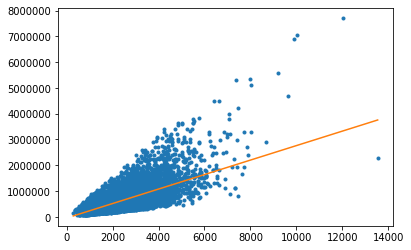

In [18]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'],model1.predict(poly1_data.drop('price',axis=1)))

In [19]:
poly2_data = polynomial_dataframe(sales['sqft_living'],2)
poly2_data['price'] = sales['price']

In [20]:
model2 = LinearRegression().fit(poly2_data.drop('price',axis=1),poly2_data['price'])

In [21]:
print(model2.intercept_,model2.coef_)

199222.2793054852 [6.79940947e+01 3.85812609e-02]


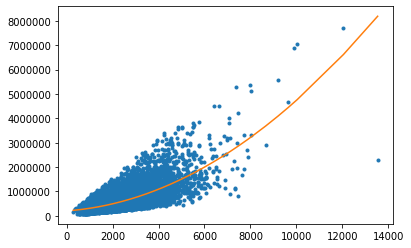

In [26]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'],model2.predict(poly2_data.drop('price',axis=1)))

In [22]:
poly3_data = polynomial_dataframe(sales['sqft_living'],3)
poly3_data['price'] = sales['price']

In [23]:
model3 = LinearRegression().fit(poly3_data.drop('price',axis=1),poly3_data['price'])

In [25]:
print(model3.intercept_,model3.coef_)

336819.7482212147 [-9.01819864e+01  8.70465089e-02 -3.84055260e-06]


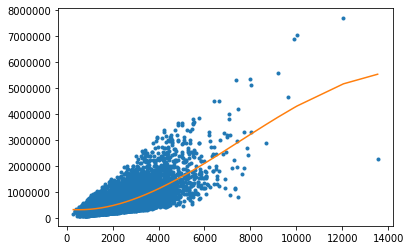

In [27]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
        poly3_data['power_1'],model3.predict(poly3_data.drop('price',axis=1)))

In [30]:
poly15_data = polynomial_dataframe(sales['sqft_living'],15)
poly15_data['price'] = sales['price']

In [31]:
model15 = LinearRegression().fit(poly15_data.drop('price',axis=1),poly15_data['price'])

In [32]:
print(model15.intercept_,model15.coef_)

537116.32963771 [ 4.56404164e-91  6.91712144e-51  2.57732607e-56  2.78197887e-88
  1.19863929e-74  2.68575522e-71  2.26147568e-67  1.85900299e-63
  1.47144116e-59  1.09771012e-55  7.43509038e-52  4.23015578e-48
  1.61618577e-44 -2.49283826e-48  9.59718336e-53]


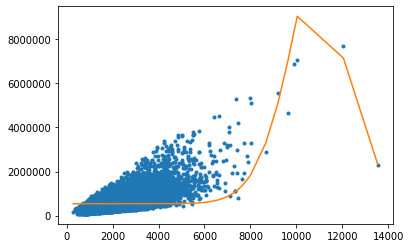

In [33]:
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
        poly15_data['power_1'],model15.predict(poly15_data.drop('price',axis=1)))

539058.8186681797 [ 3.05794168e-90 -1.69394900e-49  2.35908952e-55  1.21888065e-88
  3.23082736e-74  1.10358333e-70  8.37724029e-67  6.23411957e-63
  4.49156442e-59  3.06938763e-55  1.91749300e-51  1.01335180e-47
  3.62176959e-44 -5.63501661e-48  2.18641116e-52]


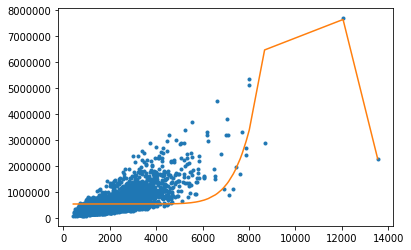

506913.1337913552 [ 2.71335943e-77  7.33542374e-39 -1.85052450e-44  1.39207185e-49
  5.73786189e-71  1.51934986e-58  3.64549609e-55  1.50416255e-51
  5.76015653e-48  1.95770493e-44  5.39396528e-41  9.40376341e-38
 -3.63529134e-41  4.65476514e-45 -1.97199988e-49]


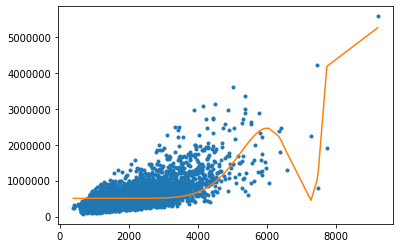

530874.3166533327 [ 2.83751934e-88 -7.80224148e-49 -1.38766434e-55  3.98272978e-59
  1.57170169e-72  4.27894908e-69  2.68009626e-65  1.63911362e-61
  9.66435015e-58  5.38044653e-54  2.72563636e-50  1.16253248e-46
  3.33756141e-43 -6.76238818e-47  3.43132932e-51]


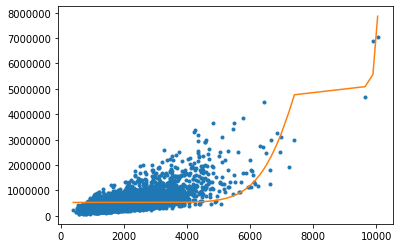

494818.878392481 [ 1.37116050e-76  2.79678944e-40 -4.25065052e-44  6.08163270e-50
  2.58420332e-70  5.29002497e-58  1.27070045e-54  4.87868972e-51
  1.73549022e-47  5.47058320e-44  1.39587599e-40  2.25041871e-37
 -9.43954119e-41  1.31573060e-44 -6.09163408e-49]


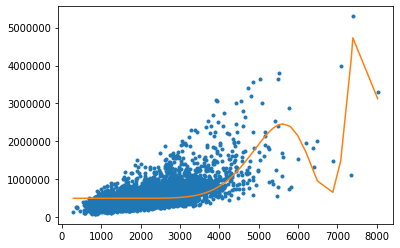

In [35]:
for i in range(1,5):
    sales = pd.read_csv(f'{PATH}wk3_kc_house_set_{i}_data.csv', dtype=dtype_dict)
    sales = sales.sort_values(['sqft_living','price'])
    poly15_data = polynomial_dataframe(sales['sqft_living'],15)
    poly15_data['price'] = sales['price']
    model15 = LinearRegression().fit(poly15_data.drop('price',axis=1),poly15_data['price'])
    print(model15.intercept_,model15.coef_)
    plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
        poly15_data['power_1'],model15.predict(poly15_data.drop('price',axis=1)))
    plt.show()

In [39]:
train = pd.read_csv(f'{PATH}wk3_kc_house_train_data.csv',dtype=dtype_dict)
valid = pd.read_csv(f'{PATH}wk3_kc_house_valid_data.csv',dtype=dtype_dict)
test = pd.read_csv(f'{PATH}wk3_kc_house_test_data.csv',dtype=dtype_dict)

In [40]:
def rss(x,y): return ((x-y)**2).sum()

In [45]:
min_err = 10**100
for i in range(1,16):
    poly_train_data = polynomial_dataframe(train['sqft_living'],i)
    poly_train_data['price'] = train['price']
    poly_valid_data = polynomial_dataframe(valid['sqft_living'],i)
    poly_valid_data['price'] = valid['price']
    poly_test_data = polynomial_dataframe(test['sqft_living'],i)
    poly_test_data['price'] = test['price']
    model = LinearRegression().fit(poly_train_data.drop('price',axis=1),poly_train_data['price'])
    validation_err = rss(model.predict(poly_valid_data.drop('price',axis=1)),poly_valid_data['price'])
    print(i, "{:e}".format(validation_err), 'validation')
    test_err = rss(model.predict(poly_test_data.drop('price',axis=1)),poly_test_data['price'])
    print(i, "{:e}".format(test_err), 'test')
    if validation_err < min_err: min_err = validation_err
    print('----------------------------')
print("{:e}".format(min_err))

1 6.290979e+14 validation
1 1.423479e+14 test
----------------------------
2 6.239551e+14 validation
2 1.355420e+14 test
----------------------------
3 6.258203e+14 validation
3 1.355860e+14 test
----------------------------
4 6.299873e+14 validation
4 1.353827e+14 test
----------------------------
5 6.282384e+14 validation
5 1.354958e+14 test
----------------------------
6 5.662686e+14 validation
6 1.352251e+14 test
----------------------------
7 1.073846e+15 validation
7 1.330473e+14 test
----------------------------
8 7.087929e+15 validation
8 1.348738e+14 test
----------------------------
9 4.530319e+16 validation
9 1.456630e+14 test
----------------------------
10 2.475506e+17 validation
10 1.636977e+14 test
----------------------------
11 1.193909e+18 validation
11 1.844836e+14 test
----------------------------
12 5.102199e+18 validation
12 2.043185e+14 test
----------------------------
13 7.616230e+17 validation
13 2.699609e+14 test
----------------------------
14 2.297561e+18 v